<font face="Bookman Old Style"><font size="4">corpus = ['I love nlp', 'I will learn nlp in 2 months', 'nlp is the future of data science',
'nlp saves time and solves a lot of industry problems','nlp uses machine learning']

<font size="6"><font face="Bookman Old Style"><b><center>Question 1</center></b><br>
<font size="4">1. For the above corpus, build word embeddings using Gensim library with:<br>
a) 50 features, context window is 3, CBOW<br>
b) 30 features, context window is 5, Skipgram<br>
c) Print the vocabulary of the model<br>
d) Print the word embedding vector for all words in the vocabulary<br>
e) Plot a 2D graph for the word embeddings using PCA<br>
f) Find similarity between the word vectors for ‘nlp’ and ‘data’<br>
g) Find the most similar word vectors for the word vector ‘machine’<br>
h) Find the odd one out for the word vectors ‘nlp’, ‘industry’, ‘learning’

In [1]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
corpus = ['I love nlp', 'I will learn nlp in 2 months', 'nlp is the future of data science',
'nlp saves time and solves a lot of industry problems', 'nlp uses machine learning']
corpus


Bad key text.latex.preview in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

['I love nlp',
 'I will learn nlp in 2 months',
 'nlp is the future of data science',
 'nlp saves time and solves a lot of industry problems',
 'nlp uses machine learning']

In [2]:
#1a
model_a = Word2Vec(sentences=[sentence.split() for sentence in corpus], vector_size=50, window=3, sg=0,min_count=1)
model_a

In [3]:
#1b
model_b = Word2Vec(sentences=[sentence.split() for sentence in corpus], vector_size=30, window=5, sg=1,min_count=1)
model_b

In [4]:
#1c
print("Vocabulary of Model a (CBOW):", list(model_a.wv.index_to_key))
print("Vocabulary of Model b (Skipgram):", list(model_b.wv.index_to_key))

Vocabulary of Model a (CBOW): ['nlp', 'I', 'of', 'love', 'will', 'learn', 'in', '2', 'months', 'is', 'the', 'future', 'learning', 'machine', 'science', 'saves', 'time', 'and', 'solves', 'a', 'lot', 'industry', 'problems', 'uses', 'data']
Vocabulary of Model b (Skipgram): ['nlp', 'I', 'of', 'love', 'will', 'learn', 'in', '2', 'months', 'is', 'the', 'future', 'learning', 'machine', 'science', 'saves', 'time', 'and', 'solves', 'a', 'lot', 'industry', 'problems', 'uses', 'data']


In [5]:
#1d
print("Word Embedding Vectors for Model a (CBOW):")
for word in list(model_a.wv.index_to_key):
    print(word, ":", model_a.wv[word])
print("\n\n")
print("Word Embedding Vectors for Model b (Skipgram):")
for word in list(model_b.wv.index_to_key):
    print(word, ":", model_b.wv[word])

Word Embedding Vectors for Model a (CBOW):
nlp : [-1.08726998e-03  4.85268072e-04  1.02047436e-02  1.80250071e-02
 -1.86096914e-02 -1.42450677e-02  1.29288072e-02  1.79685596e-02
 -1.00244535e-02 -7.54101528e-03  1.47785833e-02 -3.06267967e-03
 -9.06216633e-03  1.31027121e-02 -9.71303508e-03 -3.63310799e-03
  5.76478522e-03  1.97959598e-03 -1.65928416e-02 -1.89040098e-02
  1.46353012e-02  1.01509057e-02  1.35351745e-02  1.54732238e-03
  1.26966666e-02 -6.80626836e-03 -1.89071358e-03  1.15486030e-02
 -1.50518706e-02 -7.87677895e-03 -1.50256362e-02 -1.85674778e-03
  1.90794282e-02 -1.46375177e-02 -4.66764160e-03 -3.86223360e-03
  1.61741022e-02 -1.18689798e-02  8.40584908e-05 -9.50178131e-03
 -1.92094576e-02  1.00267269e-02 -1.75226610e-02 -8.78995564e-03
 -5.46648444e-05 -5.91362012e-04 -1.53209772e-02  1.92289520e-02
  9.96101834e-03  1.84630435e-02]
I : [-0.01632404  0.00899053 -0.00827682  0.00165933  0.01699829 -0.00892976
  0.00903447 -0.01357123 -0.00709964  0.01879532 -0.00315267

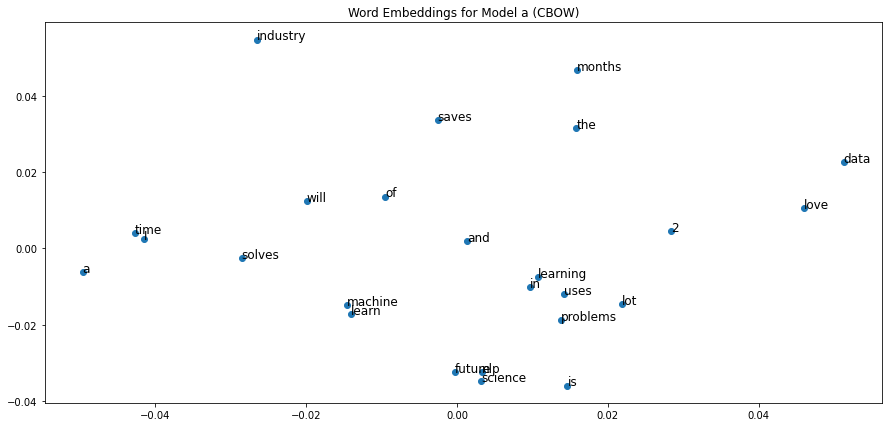

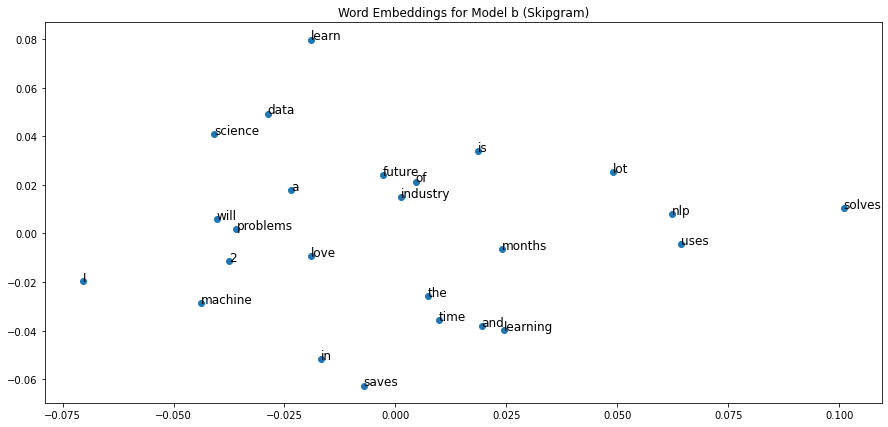

In [6]:
#1e
def plot_embeddings(model, title):
    words = list(model.wv.index_to_key)
    word_vectors = [model.wv[word] for word in words]
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(word_vectors)

    plt.figure(figsize=(15, 7))
    plt.scatter(pca_result[:, 0], pca_result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=12)
    plt.title(title)
    plt.show()

plot_embeddings(model_a, "Word Embeddings for Model a (CBOW)")
plot_embeddings(model_b, "Word Embeddings for Model b (Skipgram)")

In [7]:
#1f
similarity_a = model_a.wv.similarity('nlp', 'data')
similarity_b = model_b.wv.similarity('nlp', 'data')
print("Similarity between 'nlp' and 'data' for Model a (CBOW):", similarity_a)
print("Similarity between 'nlp' and 'data' for Model b (Skipgram):", similarity_b)

Similarity between 'nlp' and 'data' for Model a (CBOW): -0.010477907
Similarity between 'nlp' and 'data' for Model b (Skipgram): -0.022715662


In [8]:
#1g
most_similar_a = model_a.wv.most_similar('machine')
most_similar_b = model_b.wv.most_similar('machine')
print("Most similar words to 'machine' for Model a (CBOW):", most_similar_a)
print("Most similar words to 'machine' for Model b (Skipgram):", most_similar_b)

Most similar words to 'machine' for Model a (CBOW): [('learn', 0.30655819177627563), ('solves', 0.26751062273979187), ('future', 0.19032438099384308), ('will', 0.15375164151191711), ('nlp', 0.1502552330493927), ('is', 0.12596385180950165), ('2', 0.1183733269572258), ('problems', 0.09675164520740509), ('industry', 0.0741281658411026), ('and', 0.06105608493089676)]
Most similar words to 'machine' for Model b (Skipgram): [('2', 0.3761751055717468), ('I', 0.3443875312805176), ('future', 0.2855755388736725), ('saves', 0.25193119049072266), ('in', 0.2461588978767395), ('time', 0.15998242795467377), ('learn', 0.1100124791264534), ('the', 0.09409680217504501), ('learning', 0.07812688499689102), ('problems', 0.0297559704631567)]


In [9]:
#1h
odd_one_out_a = model_a.wv.doesnt_match(['nlp', 'industry', 'learning'])
odd_one_out_b = model_b.wv.doesnt_match(['nlp', 'industry', 'learning'])
print("Odd one out for Model a (CBOW):", odd_one_out_a)
print("Odd one out for Model b (Skipgram):", odd_one_out_b)

Odd one out for Model a (CBOW): industry
Odd one out for Model b (Skipgram): industry


<font size="6"><font face="Bookman Old Style"><b><center>Question 2</center></b><br>
<font size="4"> 2. For the above corpus, build document vectors using Gensim library with:<br>
a) 10 features, context window is 3<br>
b) Print the vocabulary of the model<br>
c) Print the document vector for each sentence in the corpus<br>
d) Find similarity between 3rd and 5th sentence<br>
e) Find the most similar document vector for the 5th sentence

In [10]:
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
#2a
tagged_data = [TaggedDocument(words=sentence.split(), tags=[str(i)]) for i, sentence in enumerate(corpus)]
model = Doc2Vec(vector_size=10, window=3, min_count=1, workers=4)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=100)

In [12]:
#2b
print("Vocabulary of the Doc2Vec model:", list(model.wv.index_to_key))

Vocabulary of the Doc2Vec model: ['nlp', 'I', 'of', 'love', 'will', 'learn', 'in', '2', 'months', 'is', 'the', 'future', 'learning', 'machine', 'science', 'saves', 'time', 'and', 'solves', 'a', 'lot', 'industry', 'problems', 'uses', 'data']


In [13]:
#2c
for i, sentence in enumerate(corpus):
    doc_vector = model.infer_vector(sentence.split())
    print(f"Document Vector for Sentence {i+1} ({corpus[i]}):\n{doc_vector}\n")

Document Vector for Sentence 1 (I love nlp):
[-0.04851671  0.00598339  0.02082311  0.0387492  -0.03670168 -0.04949873
 -0.00147565  0.01927777 -0.06277922 -0.0068875 ]

Document Vector for Sentence 2 (I will learn nlp in 2 months):
[ 0.01456238  0.01016125 -0.1101497  -0.0682741   0.04945953 -0.07618389
 -0.04195224 -0.04272318 -0.04989284 -0.03326601]

Document Vector for Sentence 3 (nlp is the future of data science):
[-0.00628071  0.0486217  -0.07976462 -0.04973468  0.02488073 -0.04340114
 -0.04201055 -0.02036519 -0.02243018 -0.0012448 ]

Document Vector for Sentence 4 (nlp saves time and solves a lot of industry problems):
[ 0.01868482  0.06150073 -0.07824477 -0.05209895  0.0365365  -0.05255221
 -0.03428287 -0.00298622 -0.03716641 -0.02158441]

Document Vector for Sentence 5 (nlp uses machine learning):
[ 0.0180447   0.02485608 -0.05460394 -0.04308893  0.01576895 -0.04588205
  0.01230913 -0.04286578 -0.08054677 -0.0622938 ]



In [14]:
#2d
similarity_3_5 = cosine_similarity([model.infer_vector(corpus[2].split())], [model.infer_vector(corpus[4].split())])[0][0]
print("Similarity between the 3rd and 5th sentence:", similarity_3_5)

Similarity between the 3rd and 5th sentence: 0.638196


In [15]:
#2e
most_similar_doc = model.dv.most_similar(4) 
most_similar_sentence_index = int(most_similar_doc[0][0])
most_similar_similarity = most_similar_doc[0][1]
most_similar_sentence = corpus[most_similar_sentence_index]

print("Most similar document vector to the 5th sentence:")
print(f"Sentence Index: {most_similar_sentence_index}")
print(f"Sentence: {most_similar_sentence}")
print(f"Similarity Score: {most_similar_similarity}")

Most similar document vector to the 5th sentence:
Sentence Index: 2
Sentence: nlp is the future of data science
Similarity Score: 0.35360080003738403


<font size="6"><font face="Bookman Old Style"><b><center>Question 3</center></b><br>
<font size="4">3. For the above corpus, build character n-gram vectors using Gensim library with:<br>
a) 20 features, context window is 4, min character n-gram 3 and max character n-gram 6<br>
b) Print the vocabulary of the model<br>
c) Find similarity between the Out of vocabulary vectors ‘mac’ and ‘mon’<br>
d) Find the most similar vectors for the out of vocabulary vector ‘macmon’

In [16]:
from gensim.models import FastText
import numpy as np

In [17]:
#3a
corpus_words = [sentence.split() for sentence in corpus]
model = FastText(sentences=corpus_words, vector_size=100, window=5, min_n=3, max_n=6)

In [18]:
#3b
print("Vocabulary of the FastText model:", list(model.wv.index_to_key))

Vocabulary of the FastText model: ['nlp']


In [19]:
#3c
similarity_mac_mon = model.wv.similarity('mac', 'mon')
print("Similarity between 'mac' and 'mon':", similarity_mac_mon)

Similarity between 'mac' and 'mon': 0.056826882


In [20]:
#3d
out_of_vocab_word = 'macmon'
ngram_vectors = [model.wv[ngram] for ngram in out_of_vocab_word if ngram in model.wv]
if ngram_vectors:
    avg_vector = np.mean(ngram_vectors, axis=0)
    most_similar_words = model.wv.similar_by_vector(avg_vector)
else:
    most_similar_words = []

print("Most similar words to 'macmon':")
for word, similarity in most_similar_words:
    print(word, ":", similarity)

Most similar words to 'macmon':
nlp : 0.05789657682180405
